# Rawan Abu Alkhayr - 4111751

In [7]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
from sklearn import svm, preprocessing
from matplotlib import style

In [8]:
# Load the data
data = pd.read_csv('Hotel Reservations.csv')

In [9]:
# Explore the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [12]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# The majority of customers are adults or families with children (type of customers)

This code effectively illustrates the distribution of customer types (adults or families with children) within the dataset. Firstly, a new column 'customer_type' is created based on the number of adults in each booking. If the number of adults is greater than zero, the customer type is labeled as 'Adults'; otherwise, it is labeled as 'Families with Children'. This classification captures the majority of customers, as adults may be booking individually or as part of a family with children. A pie chart is generated to visualize the distribution of customer types. The autopct parameter displays the percentage of each category, and explode is used to emphasize one segment ('Families with Children') by pulling it slightly outwards. Overall, this visualization offers a clear understanding of the predominant customer types within the dataset.

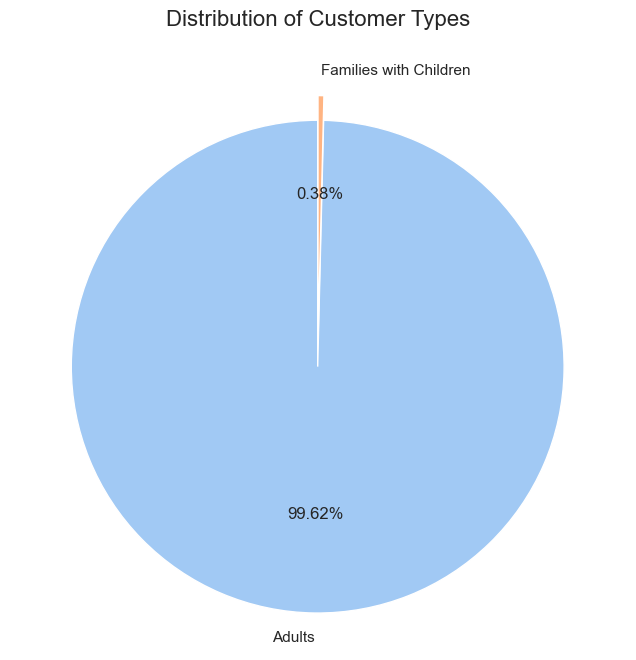

In [13]:
# Create a new column for customer type
data['customer_type'] = data['no_of_adults'].apply(lambda x: 'Adults' if x > 0 else 'Families with Children')

# Set Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

# Plot a pie chart with a color palette
colors = sns.color_palette('pastel')[0:2]
data['customer_type'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, explode=(0.1, 0), startangle=90)
plt.title('Distribution of Customer Types', fontsize=16)
plt.ylabel('')  # Remove the default 'count' label
plt.show()

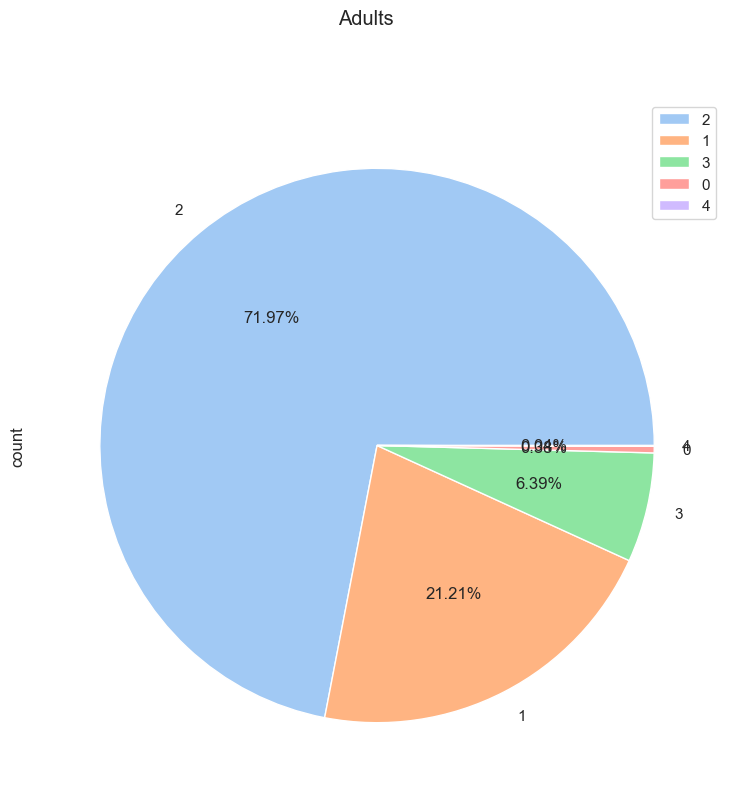

In [14]:
data.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count', ascending=False).plot(
    kind='pie',
    autopct='%1.2f%%',
    subplots=True,
    title='Adults',
    figsize=(9, 9),
    colors=sns.color_palette('pastel'),
)

plt.show()

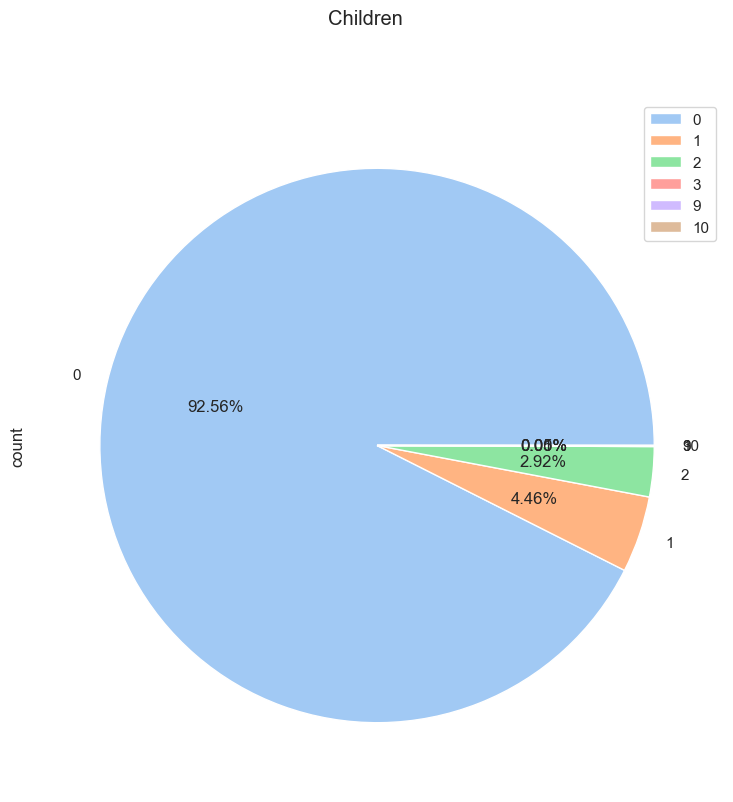

In [15]:
data.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count', ascending=False).plot(
    kind='pie',
    autopct='%1.2f%%',
    subplots=True,
    title='Children',
    figsize=(9, 9),
    colors=sns.color_palette('pastel'),
)

plt.show()

Adults    33577
Family     2698
Name: customer_type, dtype: int64


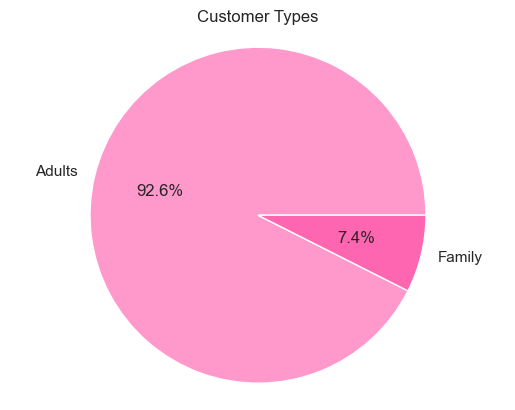

In [16]:
# Assuming 'data' is your DataFrame
data['customer_type'] = 'Adults'
data.loc[data['no_of_children'] > 0, 'customer_type'] = 'Family'

customer_counts = data['customer_type'].value_counts()
print(customer_counts)

# Set color to pink
colors = ['#FF99CC', '#FF66B2']

# Visualization part
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Customer Types')
plt.axis('equal')
plt.show()

# Type of customers are less likely to cancel the booking

This code snippet creates a pie chart to illustrate the distribution of booking statuses (canceled or not canceled) within the dataset. Initially, the counts of each unique booking status are computed using the value_counts() function. This visualization provides a clear overview of the distribution of booking statuses, facilitating easy interpretation of the proportion of bookings that were canceled compared to those that were not canceled.

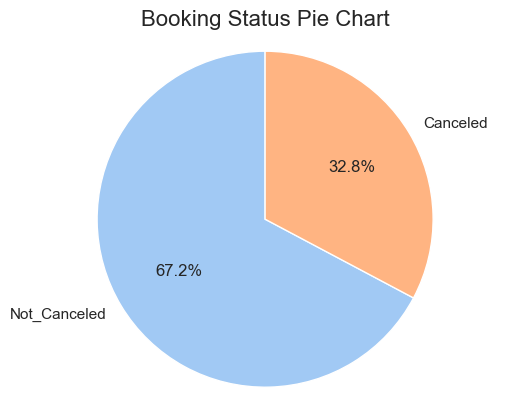

In [17]:
booking_status = data['booking_status']

# Count the values
counts = booking_status.value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Define pink color palette
colors = sns.color_palette('pastel')[0:2]

# Draw a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Booking Status Pie Chart', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Majority of bookings were not canceled, still some half of the bookings were canceled

This code analyzes the cancellation rate of bookings based on customer type, where customers are categorized as either 'Adults' or 'Family' depending on the presence of children in the booking. First, a new column 'customer_type' is created in the DataFrame, initially labeled as 'Adults'. Then, for bookings with children (i.e., 'no_of_children' > 0), the 'customer_type' is updated to 'Family'. Next, the cancellation rate is calculated by grouping the data based on 'customer_type' and 'booking_status', and computing the normalized value counts for each category. The cancellation rates are then extracted for each customer type ('Adults' and 'Family'). The x-axis represents the customer type, while the y-axis represents the cancellation rate. This visualization provides insights into cancellation behavior, allowing for comparisons between customer segments and informing strategies to mitigate cancellations.

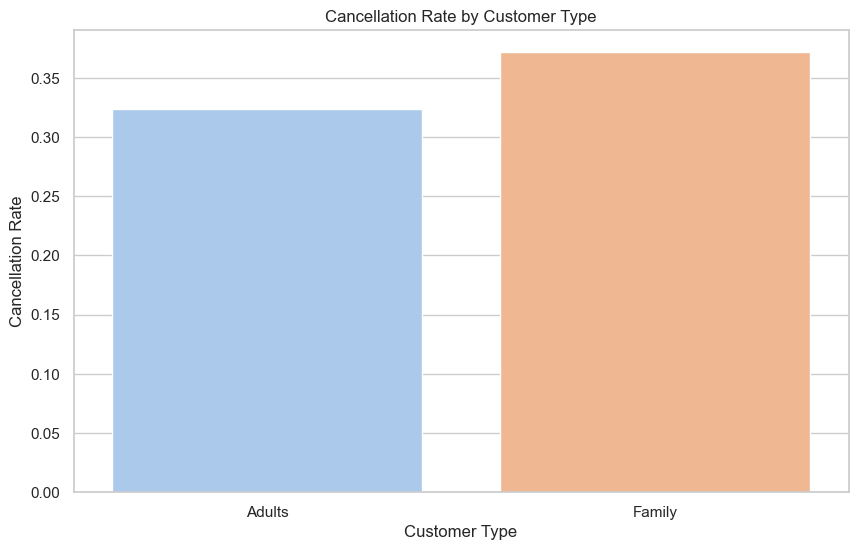

In [18]:
data['customer_type'] = 'Adults'
data.loc[data['no_of_children'] > 0, 'customer_type'] = 'Family'

# Calculate cancellation rate by customer type
cancellation_rate = data.groupby('customer_type')['booking_status'].value_counts(normalize=True).unstack().loc[:, 'Canceled']

# Set Seaborn style
sns.set(style="whitegrid")

# Draw a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette='pastel')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()

# The majority of customers stay over the weekend or on weeknights

This code creates side-by-side count plots to visualize the distribution of customers staying over the weekend versus weeknights. Each subplot displays the count of customers for different durations of weekend or weeknight stays. The use of two subplots enables a direct comparison of these distributions, facilitating an understanding of customer booking patterns. The figure size is adjusted to ensure clear visualization, and aesthetic palettes are chosen for both plots. Titles, axis labels, and tight layout spacing enhance the readability of the visualization. Overall, this approach provides an effective way to visualize and compare the majority of customers' stay durations over weekends and weeknights.

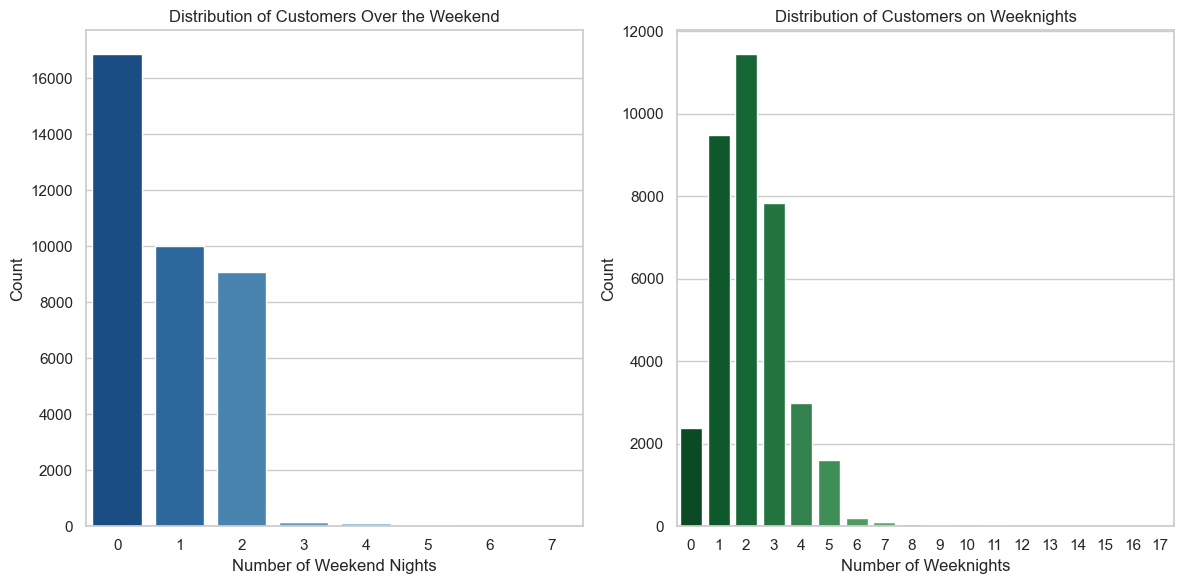

In [19]:
plt.figure(figsize=(12, 6))

# Plotting the distribution of customers staying over the weekend
plt.subplot(1, 2, 1)
sns.countplot(x='no_of_weekend_nights', data=data, palette='Blues_r')
plt.title('Distribution of Customers Over the Weekend')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Count')

# Plotting the distribution of customers staying on weeknights
plt.subplot(1, 2, 2)
sns.countplot(x='no_of_week_nights', data=data, palette='Greens_r')
plt.title('Distribution of Customers on Weeknights')
plt.xlabel('Number of Weeknights')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

This code employs Seaborn's histplot() function to generate a histogram, illustrating the distribution of the number of weeknight stays by customers. The parameter 'hue' is utilized to differentiate bars based on the number of weekend nights stayed, facilitating a visual comparison within the same plot. With the inclusion of a kernel density estimate (KDE) curve, the visualization offers a smooth approximation of the underlying distribution. The chosen color palette ensures clarity and distinction between various categories. Overall, this visualization provides valuable insights into the joint distribution of weeknight and weekend night stays, contributing to a deeper understanding of customer booking tendencies.

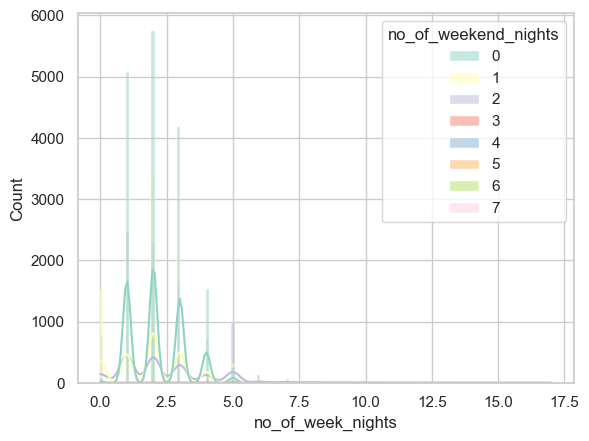

In [20]:
sns.histplot(x='no_of_week_nights', data=data, hue='no_of_weekend_nights', kde=True, palette='Set3');


# Customer behavior that tends to stay for an extended period of time for example full week

This code aims to visualize customer behavior regarding extended stays, such as a full week, by creating a histogram of the total nights stayed. The 'total_nights' column is created by summing the number of weeknights and weekend nights. A histogram is then generated using sns.histplot(), with the total nights as the data to be plotted. The 'bins' parameter specifies the number of bins for the histogram, ensuring appropriate granularity. Setting kde=True adds a kernel density estimate (KDE) curve to provide a smooth approximation of the underlying distribution. The title, x-axis label ('Total Nights'), and y-axis label ('Frequency') are added to enhance interpretation. Overall, this visualization allows for an understanding of the distribution of total nights stayed by customers, providing insights into extended stay patterns.

C:\Users\star\AppData\Local\Temp\ipykernel_20876\3389671653.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['total_nights'], bins=20, kde=True, palette='Set3')


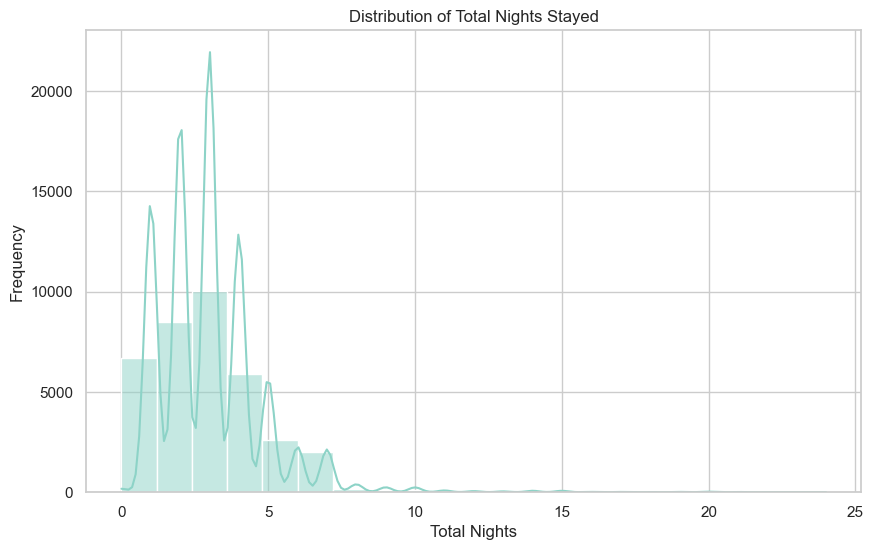

In [21]:
# Assuming have a column 'total_nights' that represents the sum of weeknights and weekend nights
data['total_nights'] = data['no_of_week_nights'] + data['no_of_weekend_nights']

sns.set_palette('Set3')

# Create a histogram 
plt.figure(figsize=(10, 6))
sns.histplot(data['total_nights'], bins=20, kde=True, palette='Set3')
plt.title('Distribution of Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.show()

This process filters bookings based on various durations, including a full week, two weeks, and three weeks, using specific criteria related to the number of weekend nights and weeknights stayed. Subsequently, the total number and percentage of bookings for each category are calculated. This information provides insights into the distribution of bookings across different durations, allowing for comparisons and understanding of customer booking behavior. Finally, a horizontal bar chart is created to visualize the percentage of bookings for each duration category, providing a clear representation of the distribution of bookings by weeks duration. Overall, this approach offers valuable insights into customer preferences regarding booking durations.

Total number of bookings for a full week: 1556
Total number of bookings for two weeks: 103
Total number of bookings for three weeks: 9


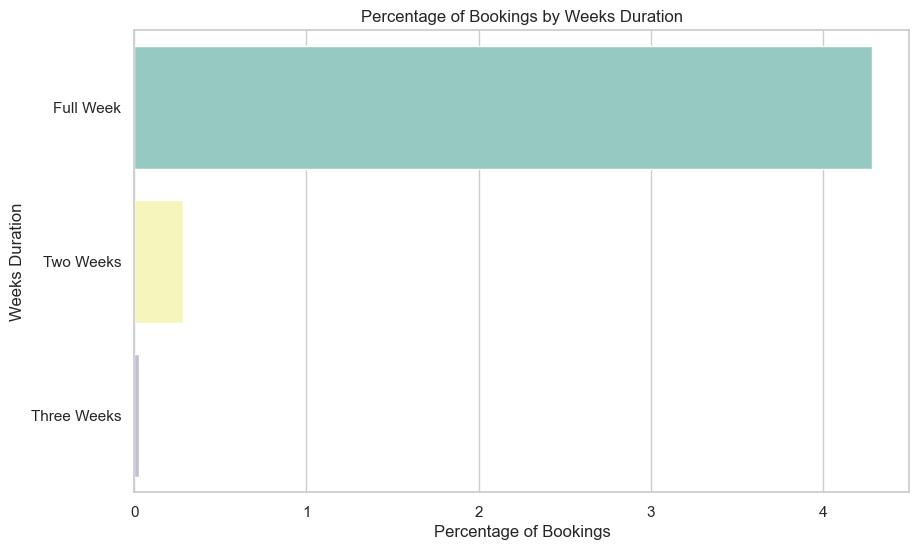

In [22]:
# Filter the bookings for a full week, two weeks, and three weeks
full_week_bookings = data[(data['no_of_weekend_nights'] >= 2) & (data['no_of_week_nights'] >= 5)]
two_weeks_bookings = data[(data['no_of_weekend_nights'] >= 4) & (data['no_of_week_nights'] >= 10)]
three_weeks_bookings = data[(data['no_of_weekend_nights'] >= 6) & (data['no_of_week_nights'] >= 15)]

# Calculate the total number and percentage of bookings for each category
total_full_week = len(full_week_bookings)
total_two_weeks = len(two_weeks_bookings)
total_three_weeks = len(three_weeks_bookings)

percentage_full_week = (total_full_week / len(data)) * 100
percentage_two_weeks = (total_two_weeks / len(data)) * 100
percentage_three_weeks = (total_three_weeks / len(data)) * 100

# Print the totals and percentages
print(f"Total number of bookings for a full week: {total_full_week}")
print(f"Total number of bookings for two weeks: {total_two_weeks}")
print(f"Total number of bookings for three weeks: {total_three_weeks}")

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=[percentage_full_week, percentage_two_weeks, percentage_three_weeks],
            y=['Full Week', 'Two Weeks', 'Three Weeks'],
            palette='Set3')

plt.title('Percentage of Bookings by Weeks Duration')
plt.xlabel('Percentage of Bookings')
plt.ylabel('Weeks Duration')
plt.show()

# Meal plan for non-cancelled bookings

This code visualizes the distribution of meal plans for non-cancelled bookings. First, a subset of the data containing only non-cancelled bookings is created by filtering the DataFrame based on the 'booking_status' column. Then, the frequency of each meal plan among non-cancelled bookings is calculated using the value_counts() function on the 'type_of_meal_plan' column. Next, a bar chart is created using sns.barplot(), where the x-axis represents the different meal plans and the y-axis represents the number of non-cancelled bookings for each meal plan. This visualization provides insights into the popularity of different meal plans among customers who do not cancel their bookings.

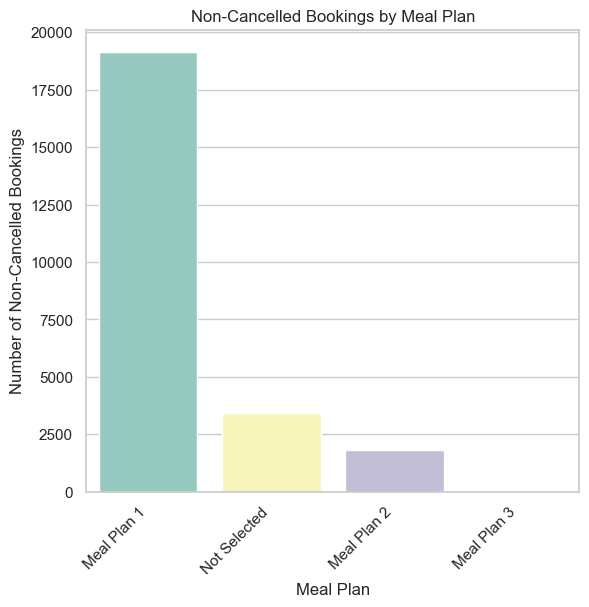

<Figure size 900x900 with 0 Axes>

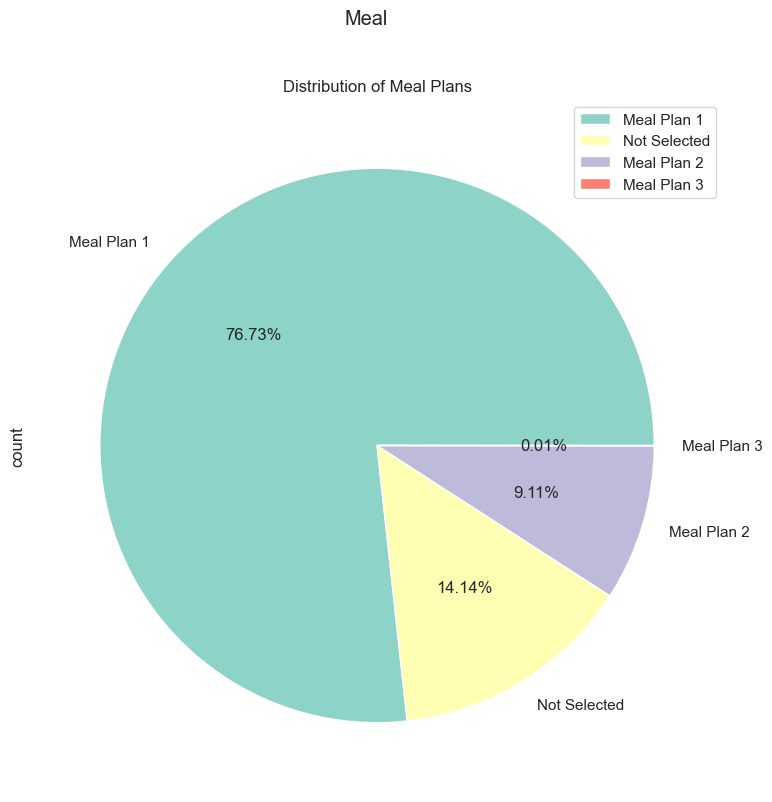

In [46]:
non_cancelled_bookings = data[data['booking_status'] == 'Not_Canceled']

# Count the frequency of each meal plan
meal_plan_counts = non_cancelled_bookings['type_of_meal_plan'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar chart with a different color and shape
plt.figure(figsize=(14, 6))

# Create the bar chart
plt.subplot(1, 2, 1)
sns.barplot(x=meal_plan_counts.index, y=meal_plan_counts.values, palette='Set3', saturation=0.75)
plt.xlabel('Meal Plan')
plt.ylabel('Number of Non-Cancelled Bookings')
plt.title('Non-Cancelled Bookings by Meal Plan')
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

# Create the pie chart
plt.figure(figsize=(9, 9))
colors = sns.color_palette('Set3')
data.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count', ascending=False).plot(
    kind='pie', autopct='%1.2f%%', subplots=True, title='Meal', figsize=(9, 9), colors=colors
)
plt.title('Distribution of Meal Plans')

# Display the pie chart
plt.show()

### Present the distribution of meal plans for non-cancelled bookings using a pie chart

# What type of room is most frequently booked by customers?

The code utilizes a horizontal bar chart to visualize the most frequently booked room types by customers.  Initially, the number of bookings for each room type is calculated using the value_counts() function applied to the 'room_type_reserved' column. The resulting room_type_counts variable contains this information, with room types as index and their respective booking counts as values. Subsequently, a horizontal bar chart is created using Seaborn's barplot() function, where the number of bookings (values) is plotted on the x-axis and room types (index) are plotted on the y-axis. Each bar represents a room type, with the length of the bar indicating the frequency of bookings for that room type. This visualization enables easy identification of the most popular room types among customers, aiding in understanding customer preferences and informing business decisions.

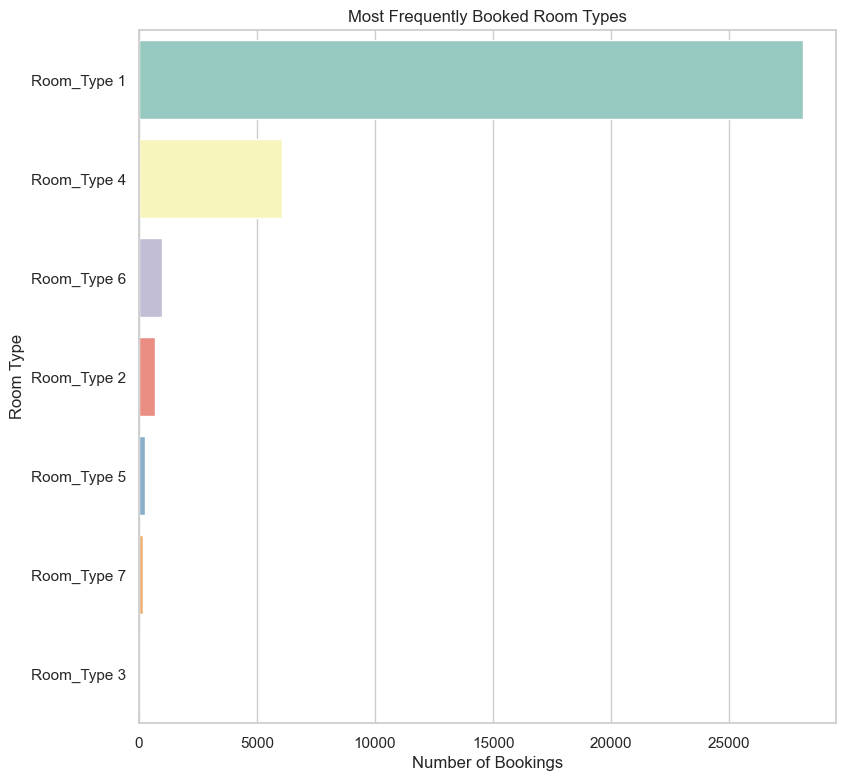

In [47]:
# Assuming 'room_type_reserved' is the correct column name for room type
room_type_counts = data['room_type_reserved'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a horizontal bar chart
plt.figure(figsize=(9, 9))
sns.barplot(x=room_type_counts.values, y=room_type_counts.index, palette='Set3')

# Add labels and title
plt.xlabel('Number of Bookings')
plt.ylabel('Room Type')
plt.title('Most Frequently Booked Room Types')

# Show the plot
plt.show()

# Booking distribution by years, months, seasons, days, etc

This code give a bar plot showing the distribution of bookings across different years. It calculates the relative frequency of bookings for each year and plots it using matplotlib. Also, This visualization allows for easy comparison of booking trends across different years, highlighting any fluctuations or patterns over time.

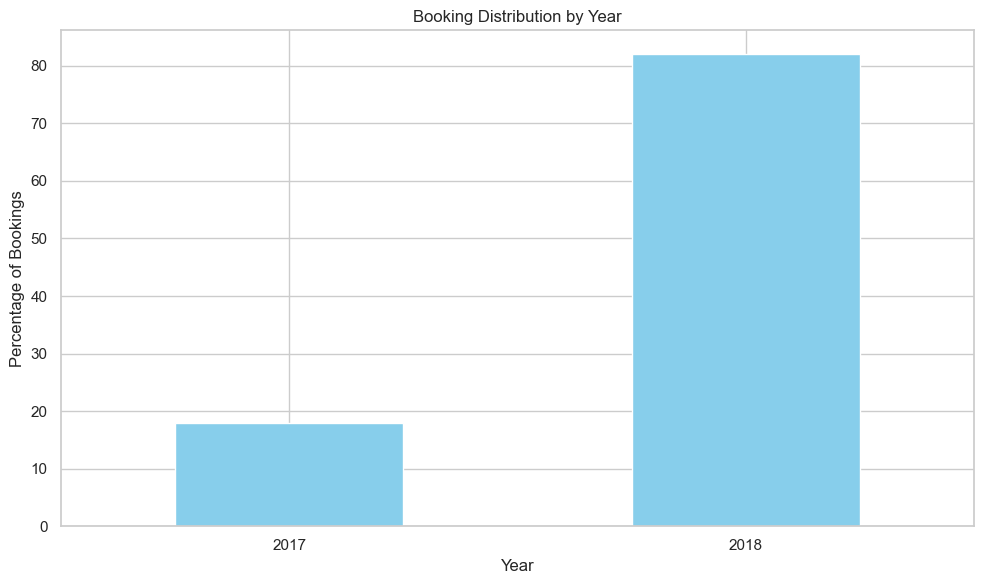

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

booking_distribution = data['arrival_year'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(10, 6))
booking_distribution.sort_index().plot(kind='bar', color='skyblue')
plt.title('Booking Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Bookings')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### 17.96% bookings were done in 2017, 82.04% in 2018. We can see increasing tendency in bookings year wise.

This code aims to visualize the distribution of bookings over the months of the year. Initially, the number of bookings for each month is calculated and sorted in ascending order. Then, month numbers are mapped to their respective month names for improved readability. The booking distribution is plotted using a bar plot, with each bar representing the number of bookings for a specific month. Finally, plt.tight_layout() is used to adjust the layout and prevent any clipping of labels. Overall, this visualization provides insights into the booking trends across different months, facilitating analysis and decision-making.

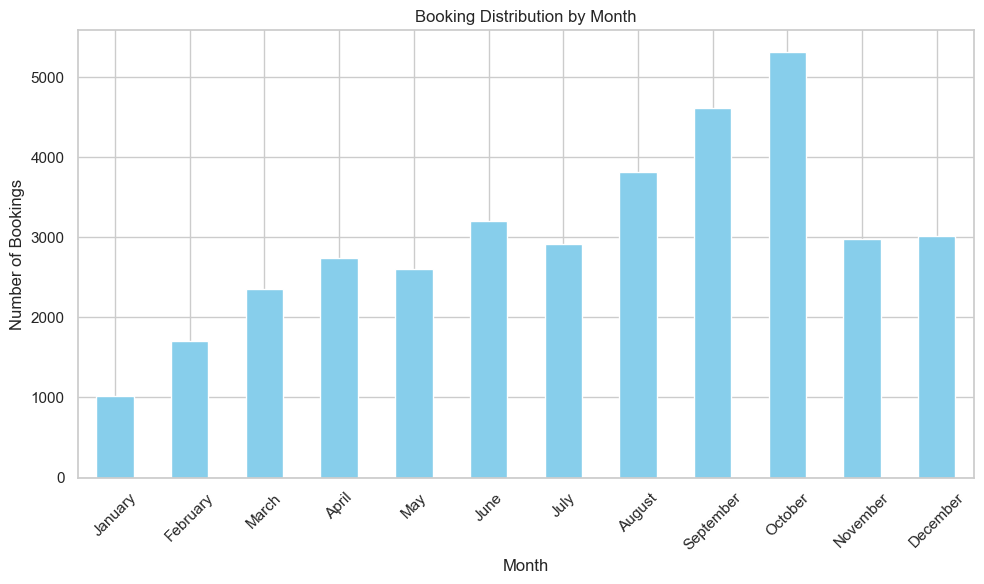

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

booking_distribution = data['arrival_month'].value_counts().sort_index()

# Mapping month numbers to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting
plt.figure(figsize=(10, 6))
booking_distribution.plot(kind='bar', color='skyblue')
plt.title('Booking Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(len(month_names)), month_names, rotation=45)  # Use month names as x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### October is the most occupied (busiest) month with 14.66% bookings and January is the most unoccupied month with 2.80% bookings.


This code aims to visualize the distribution of bookings over individual days. It first calculates the number of bookings for each unique arrival date and sorts them in ascending order. Then, a line plot is created to represent the booking distribution over days, where each point on the line corresponds to the number of bookings on a specific date. . Overall, this visualization provides insights into the daily variations in booking activity, allowing for analysis of booking trends and patterns.

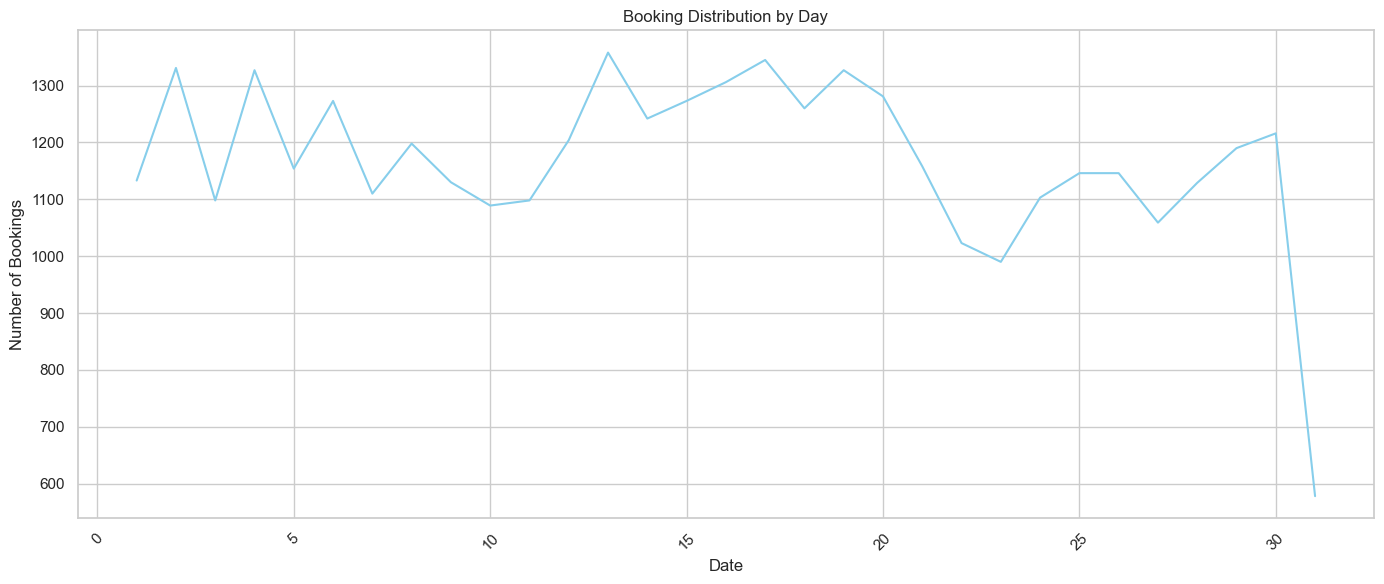

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

booking_distribution = data['arrival_date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 6))
booking_distribution.plot(kind='line', color='skyblue')
plt.title('Booking Distribution by Day')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Similarity between customers

This code utilizes hierarchical clustering and dendrogram visualization to analyze the similarity between customers based on selected features. Initially, relevant features for comparison, including the number of adults and children, weekend and weeknight stays, lead time, average room price, and special requests, are specified. The data is then sorted by customer ID to maintain consistency, followed by sampling a subset for efficiency. After normalization of the sampled data to facilitate comparison, hierarchical clustering is performed using Ward's method to group similar customers. Subsequently, a dendrogram is generated, visually depicting the hierarchical relationships between customers based on the selected features. The resulting plot offers insights into clusters of customers with similar characteristics, aiding in segmentation and targeted marketing strategies.

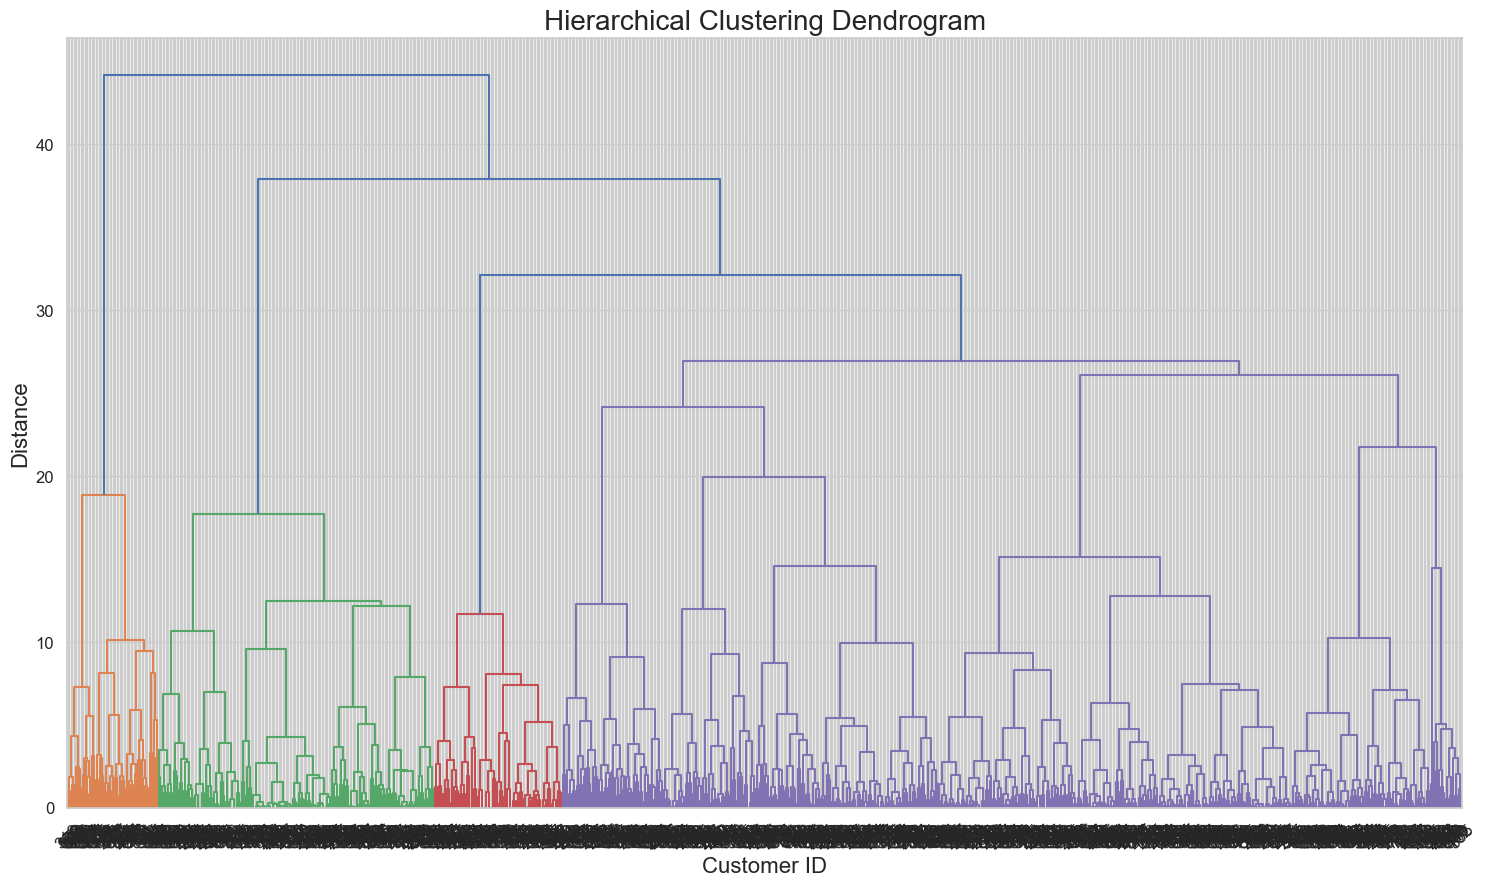

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Selecting relevant features for similarity comparison
features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
            'no_of_week_nights', 'lead_time', 'avg_price_per_room', 
            'no_of_special_requests']

# Sort the data by customer ID
sorted_data = data.sort_values(by='Booking_ID')

# Sampling a subset of your sorted data
sampled_data = sorted_data.sample(n=1000, random_state=42)

# Reset index to ensure the correct order
sampled_data.reset_index(drop=True, inplace=True)

# Normalize the sampled data for better comparison
normalized_data = (sampled_data[features] - sampled_data[features].mean()) / sampled_data[features].std()

# Compute the hierarchical clustering
Z = hierarchy.linkage(normalized_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(18, 10))
dn = hierarchy.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Customer ID', fontsize=16)
plt.ylabel('Distance', fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()

This code aims to explore the similarity between customers by first computing a similarity matrix based on selected features using z-score normalized data. The correlation matrix, obtained through the corr() function, quantifies the pairwise correlations between features, indicating how closely related they are. The resulting heatmap visualizes this matrix, where shades of red denote positive correlations, blue represents negative correlations, and lighter shades signify weaker or no correlations. By examining this heatmap, patterns of similarity or dissimilarity between customers emerge, aiding in the identification of clusters with similar characteristics. Adjustments to the heatmap's parameters can enhance visualization for clearer insights into customer relationships and segmentation.

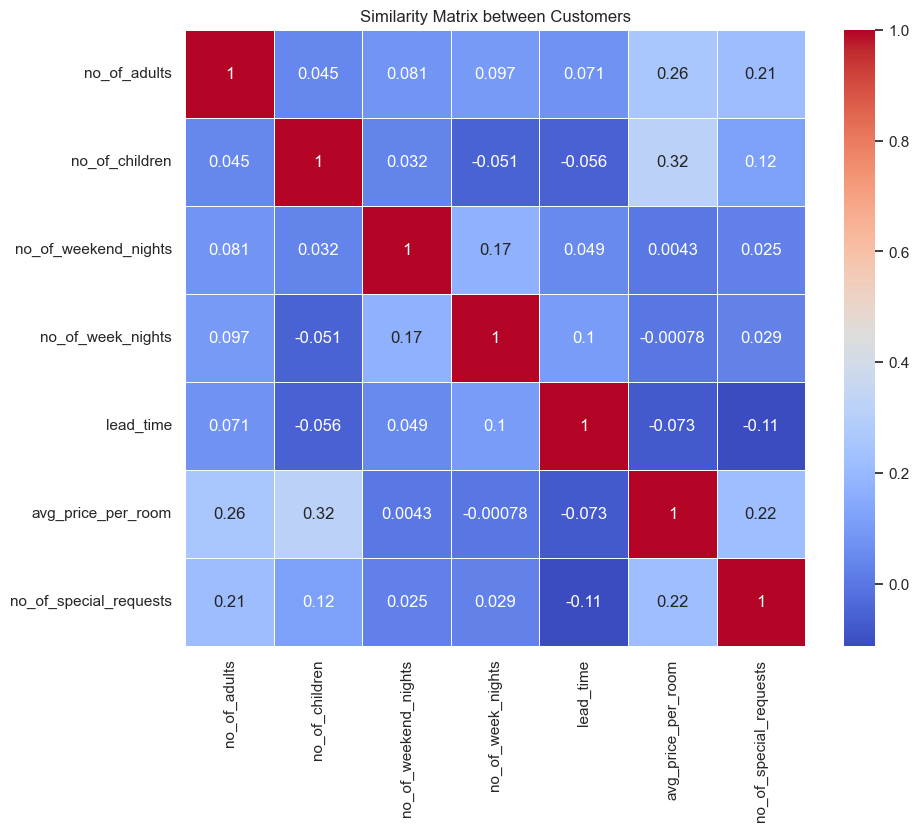

In [43]:
# Compute the similarity matrix
similarity_matrix = normalized_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Similarity Matrix between Customers')
plt.show()

This code utilizes KMeans clustering to analyze the similarity between customers based on selected features. Initially, relevant columns for clustering, including the number of adults and children, weekend and weeknight stays, car parking space requirement, lead time, average room price, and special requests, are specified. Missing values, if any, are handled, and the data is standardized using StandardScaler to ensure all features have the same scale. The number of clusters is set to 5, and KMeans clustering is performed on the standardized data. The resulting cluster labels are added to the original dataset, allowing for further analysis. Cluster sizes and average feature values for each cluster are printed to provide insights into cluster characteristics. Additionally, scatter plots for each pair of features are created, with each cluster represented by a distinct color palette. This visualization aids in identifying patterns and similarities between customers within and across clusters, enabling targeted marketing strategies and customer segmentation.

C:\Users\star\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    14153
2    10462
4     8062
1     2474
3     1124
Name: cluster, dtype: int64
         no_of_adults  no_of_children  no_of_weekend_nights  \
cluster                                                       
0            1.562425        0.002544              0.540663   
1            1.850040        1.425222              0.913500   
2            2.149876        0.000287              0.946569   
3            1.878114        0.182384              0.659253   
4            1.939097        0.006078              1.098115   

         no_of_week_nights  required_car_parking_space   lead_time  \
cluster                                                              
0                 1.739349                         0.0   45.186321   
1                 2.331447                         0.0   69.415521   
2                 2.311126                         0.0   56.135920   
3                 1.819395                         1.0   53.303381   
4                 2.896552                         0.0 

C:\Users\star\AppData\Local\Temp\ipykernel_20876\3593673148.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('cluster').mean())

KeyboardInterrupt



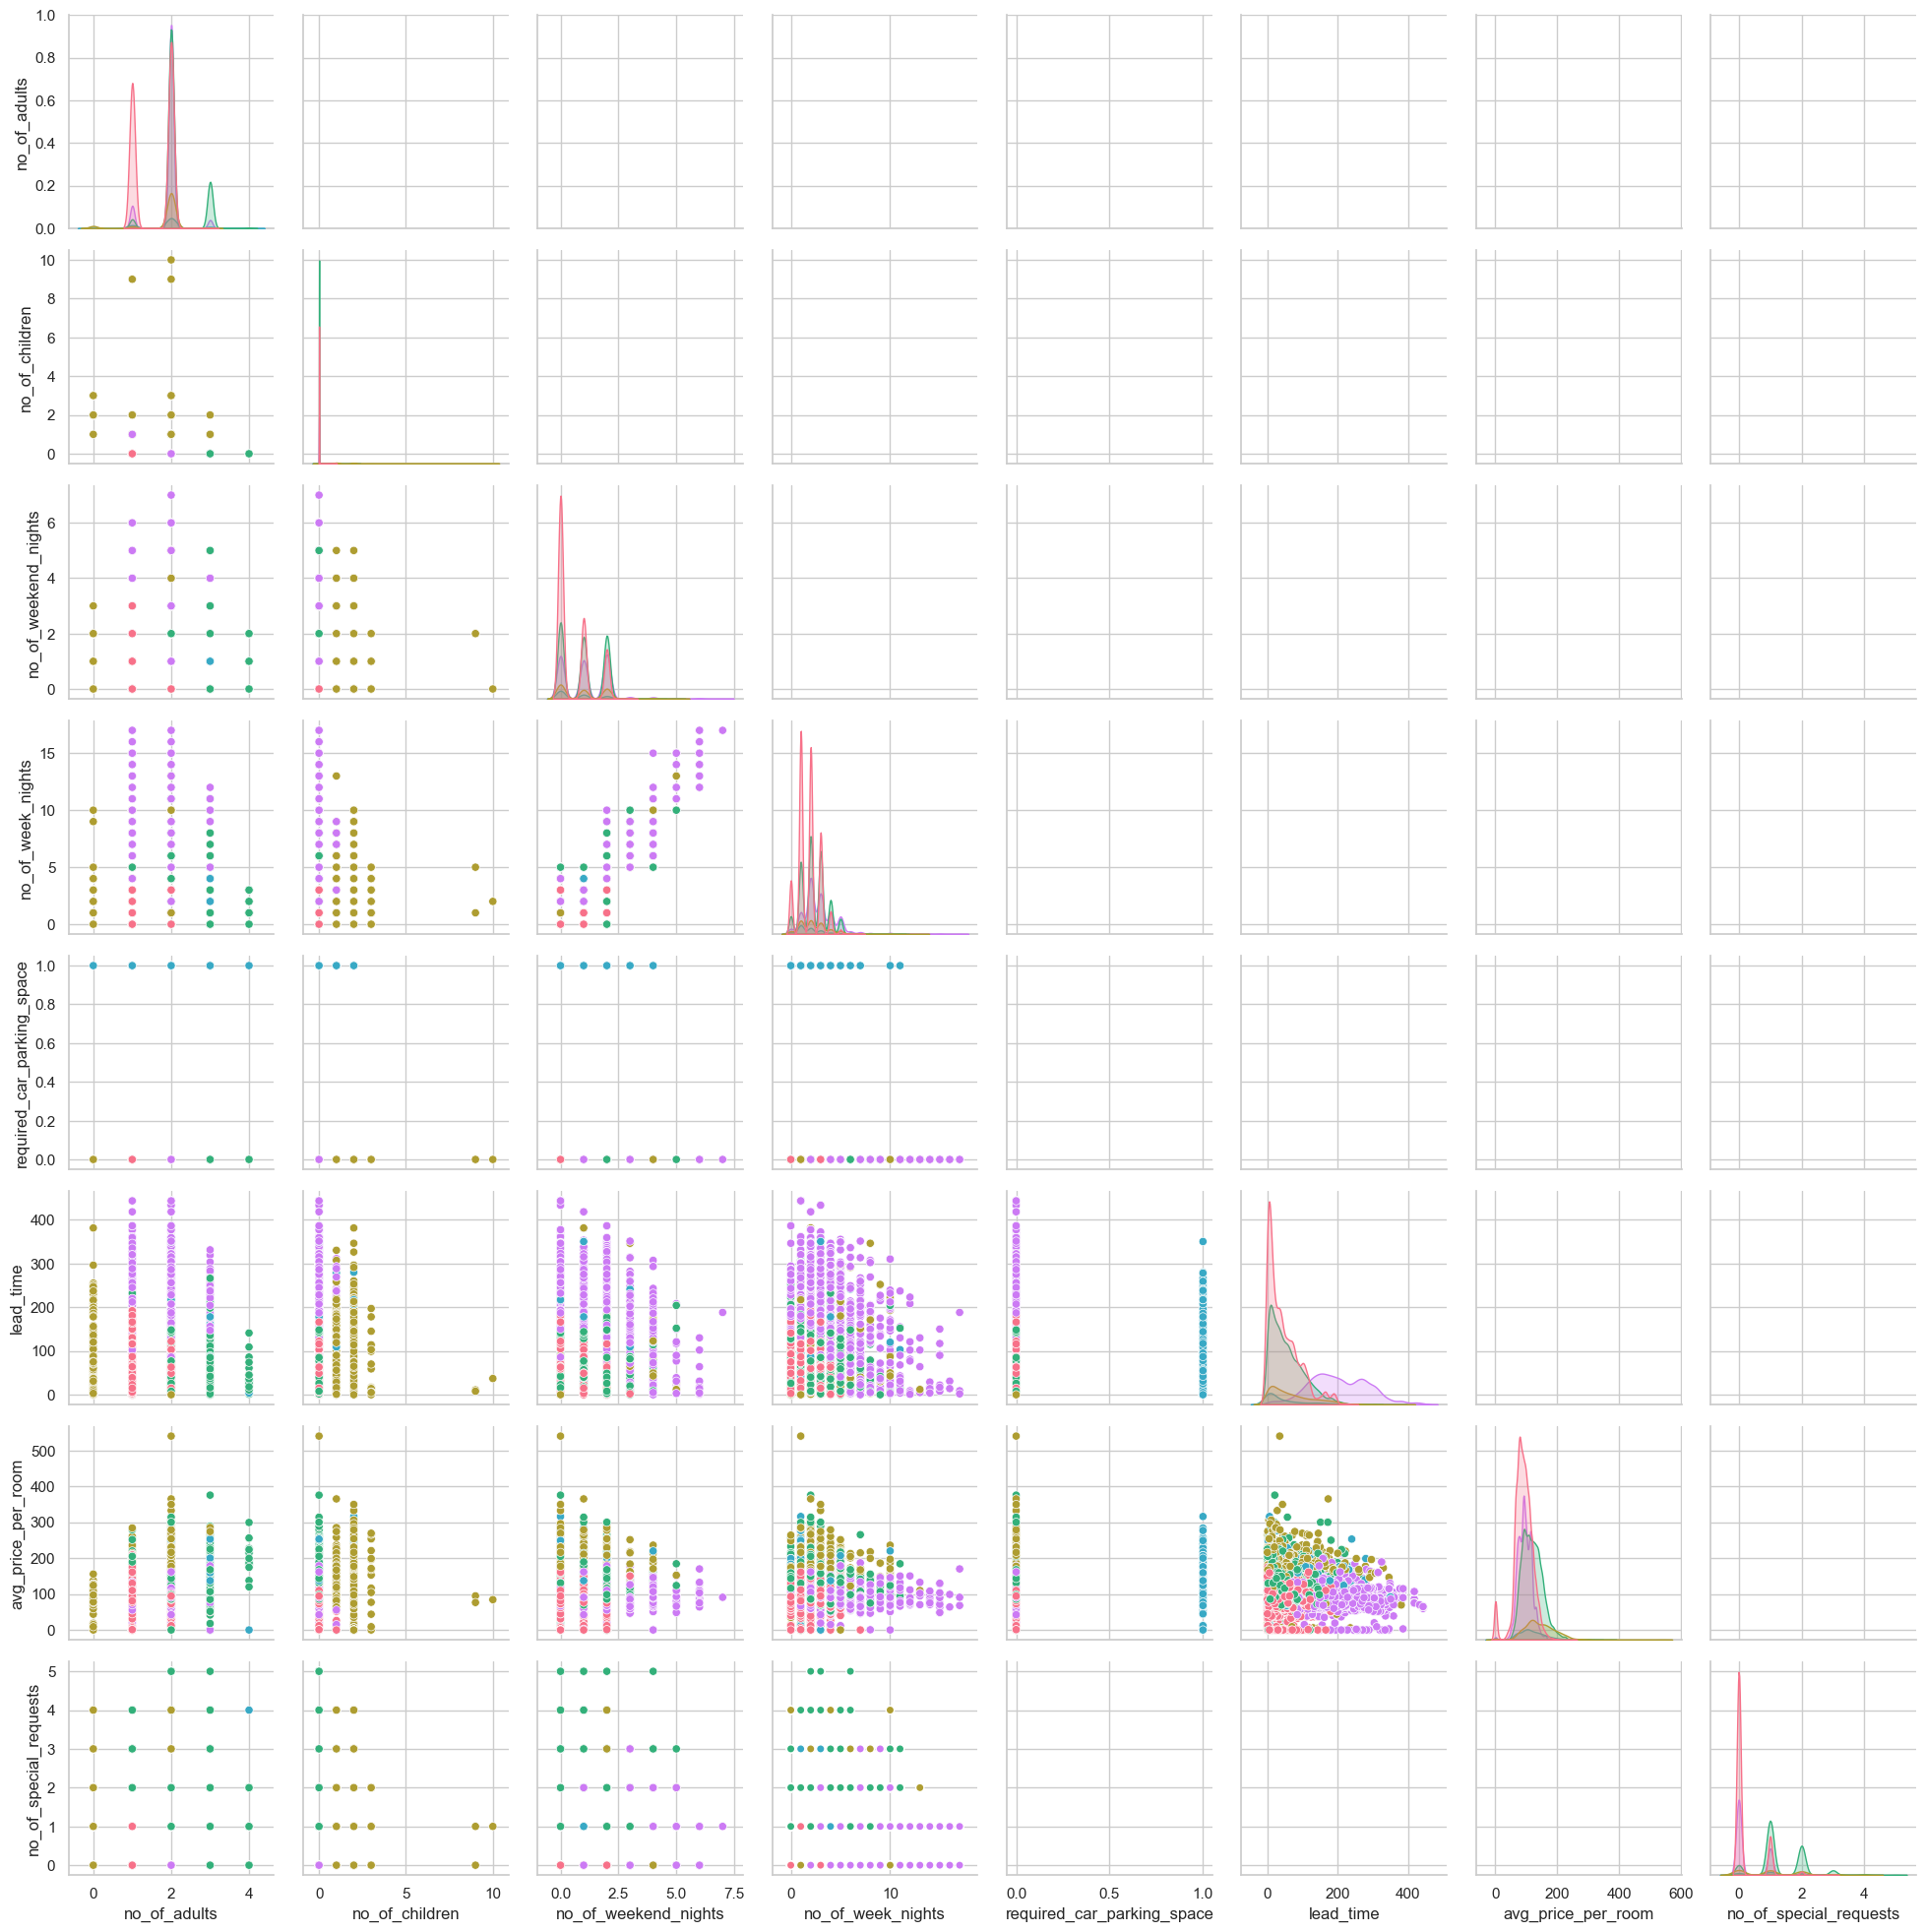

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for clustering
selected_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                      'required_car_parking_space', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']
X = data[selected_features]

# Handle missing values (if any)
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Set number of clusters
k = 5

# Perform clustering
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_std)

# Add cluster labels to the original dataset
data['cluster'] = clusters

# Print cluster sizes
print(data['cluster'].value_counts())

# Print average feature values for each cluster
print(data.groupby('cluster').mean())

# Set color palette for clusters
palette = sns.color_palette('husl', k)

# Create scatter plots for each pair of features
sns.pairplot(data, vars=X.columns, hue='cluster', palette=palette)

# Add title
plt.suptitle(f'KMeans Clustering with {k} Clusters', fontsize=16)

# Show plot
plt.show()


# Any Outlier in data

This code utilizes box plots to visually identify any outliers in the specified numerical columns of the dataset. Initially, a list of numerical columns, including the number of adults and children, weekend and weeknight stays, lead time, average room price, and special requests, is specified. Subsequently, a box plot is created for each selected numerical column in the dataset using Seaborn's `boxplot()` function. In each box plot, the central line represents the median, the box represents the interquartile range (IQR), and the whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. Data points outside this range are considered outliers and are represented as individual points beyond the whiskers. The visualization allows for the easy detection of potential outliers in the dataset, aiding in further analysis and data cleansing processes. 

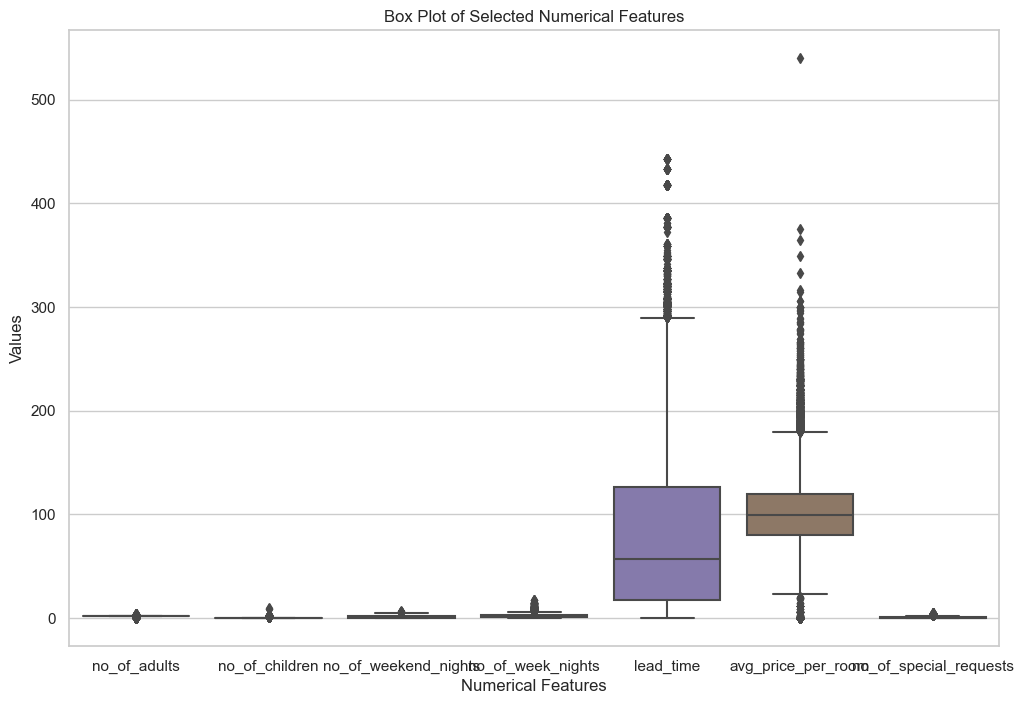

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the numerical columns you want to check for outliers in your 'data' DataFrame
numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'lead_time', 'avg_price_per_room', 'no_of_special_requests']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot for each selected numerical column in the 'data' DataFrame
sns.boxplot(data=data[numerical_columns])

# Add labels and title
plt.title('Box Plot of Selected Numerical Features')
plt.xlabel('Numerical Features')
plt.ylabel('Values')

# Show the plot
plt.show()
